## Fully connected layers + reduced transform using all 3 tasks - Cross Validation Results Evaluation

In [1]:
import sys
sys.path.append("../")
sys.path.append("../../venv/lib/python3.6/site-packages/")

In [2]:
import os
import pandas as pd
from lib import analysis_utils as au
import matplotlib.pyplot as plt
import scipy
import numpy as np

/home/jesper/tmp/venv/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Load the data

In [3]:
pred_dir = "models_preds"
# base_name = "UCLA_results_validation_cross_validation_datalen-40720_epochs-100_init_lr-0.01_momentum-0.9_batch_size-32_n_folds-5_n_folds_seed-300_split"
base_name = "test_datalen-40720_epochs-1_init_lr-0.01_momentum-0.9_batch_size-32_n_folds-5_n_folds_seed-300_split"
folds = []

for filename in os.listdir(pred_dir):
    if filename.startswith(base_name):
        print("loading ", filename)
        folds.append(pd.read_csv(os.path.join(pred_dir, filename)))
        
print ("loaded ", len(folds), " folds")

loading  test_datalen-40720_epochs-1_init_lr-0.01_momentum-0.9_batch_size-32_n_folds-5_n_folds_seed-300_split-2.csv
loading  test_datalen-40720_epochs-1_init_lr-0.01_momentum-0.9_batch_size-32_n_folds-5_n_folds_seed-300_split-4.csv
loading  test_datalen-40720_epochs-1_init_lr-0.01_momentum-0.9_batch_size-32_n_folds-5_n_folds_seed-300_split-1.csv
loading  test_datalen-40720_epochs-1_init_lr-0.01_momentum-0.9_batch_size-32_n_folds-5_n_folds_seed-300_split-0.csv
loading  test_datalen-40720_epochs-1_init_lr-0.01_momentum-0.9_batch_size-32_n_folds-5_n_folds_seed-300_split-3.csv
loaded  5  folds


In [4]:
folds[0]

,imageHASH,name,violence,protest,sign,photo,fire,police,children,group_20,...,pred_sign,pred_photo,pred_fire,pred_police,pred_children,pred_group_20,pred_group_100,pred_flag,pred_night,pred_shouting
0,b6b9984011c0c0d0,train-17156.jpg,0.455492,True,True,False,False,True,False,True,...,1.000000,1.383752e-15,1.764202e-09,2.967921e-08,3.941157e-05,1.000000,3.087411e-04,3.969073e-11,5.388218e-09,1.756021e-13
1,d5d6123331cef860,train-17918.jpg,-1.000000,False,-1,-1,-1,-1,-1,-1,...,0.984220,2.145383e-05,3.471881e-02,7.651078e-02,6.907622e-03,0.978969,1.327657e-01,2.400211e-03,1.420361e-02,3.717753e-04
2,8222252b1f4b47c7,train-01370.jpg,-1.000000,False,-1,-1,-1,-1,-1,-1,...,1.000000,1.143224e-33,2.624949e-22,6.515907e-19,4.291476e-11,1.000000,3.225600e-09,1.250062e-25,4.492187e-20,4.612326e-30
3,e5e5ccf8f4e4e4f8,train-21326.jpg,0.314813,True,True,True,False,False,False,True,...,0.999834,2.905919e-07,1.588272e-03,6.974220e-03,2.530783e-03,0.998485,1.125033e-01,1.942226e-04,5.486740e-03,3.461488e-06
4,32e4ec6ce4b4cbe4,train-07484.jpg,-1.000000,False,-1,-1,-1,-1,-1,-1,...,0.995255,9.956995e-06,8.120257e-03,2.405214e-02,1.481301e-02,0.996779,9.017273e-02,6.656864e-04,9.106888e-03,1.480584e-04
5,495933777571e1d8,train-23678.jpg,-1.000000,False,-1,-1,-1,-1,-1,-1,...,1.000000,2.589390e-10,3.777363e-06,2.189964e-05,1.605823e-03,1.000000,3.644091e-03,8.000426e-07,2.334559e-05,8.605899e-09
6,bc6e64e4e5e56f46,test-01077.jpg,0.171874,True,True,False,False,False,False,False,...,1.000000,6.550666e-29,4.922838e-19,9.851196e-17,4.549094e-09,1.000000,8.341263e-10,9.357906e-22,2.490982e-16,1.312800e-25
7,f9edade7c6c6ce2f,train-04978.jpg,-1.000000,False,-1,-1,-1,-1,-1,-1,...,0.919055,1.128242e-03,1.387335e-01,1.086605e-01,3.971373e-02,0.913053,2.996049e-01,2.360143e-02,7.865977e-02,7.630498e-03
8,405233a2960a5376,train-20743.jpg,0.327007,True,True,False,False,False,False,True,...,1.000000,6.676279e-35,2.554748e-23,6.401708e-20,4.197137e-11,1.000000,3.912908e-11,2.429001e-26,3.111800e-21,3.329046e-31
9,d10733372f2727f8,train-28094.jpg,-1.000000,False,-1,-1,-1,-1,-1,-1,...,0.995225,3.649259e-06,1.050743e-02,1.228330e-02,1.469257e-02,0.997661,2.005246e-01,7.156333e-04,3.889347e-03,5.369489e-05


### Protest

printing fold  0


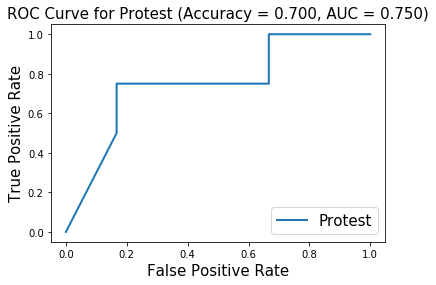

printing fold  1


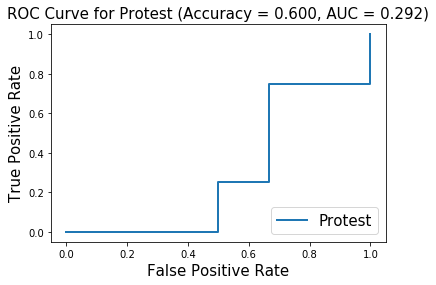

printing fold  2


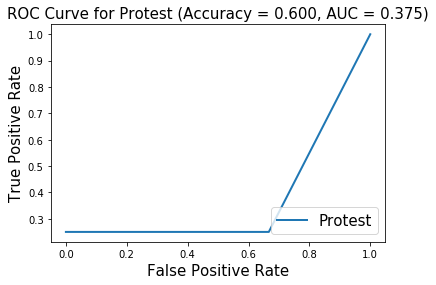

printing fold  3


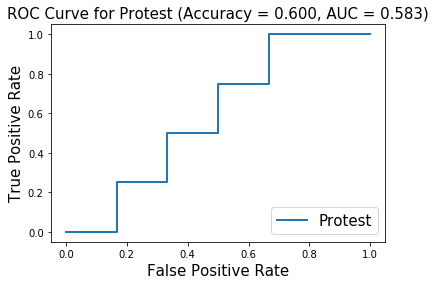

printing fold  4


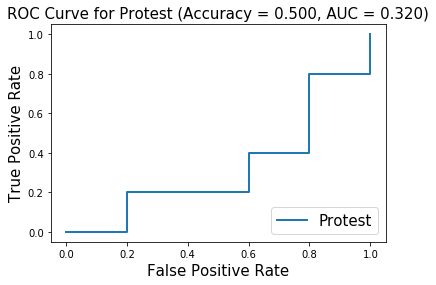

In [5]:
for indx, fold in enumerate(folds):
    print("printing fold " , indx)
    au.plotROC("protest", fold["protest"], fold["pred_protest"])

### Violence

the rsquare measure has a mean of  0.3649136035357751  and standard deviation of  0.4000443188585681
the correlation measure has a mean of  0.4637607961989093  and standard deviation of  0.387091110004775


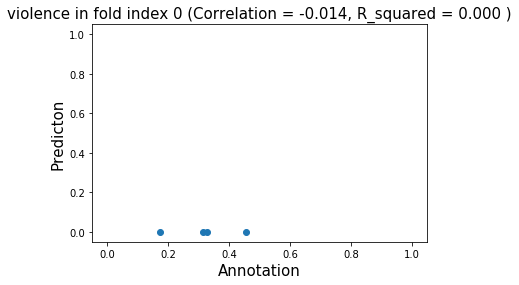

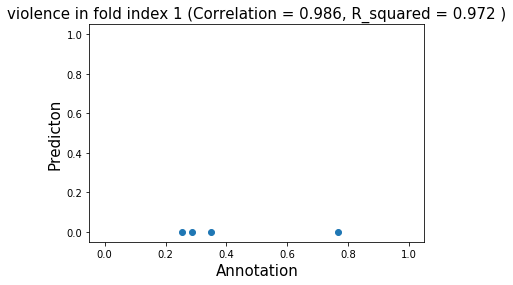

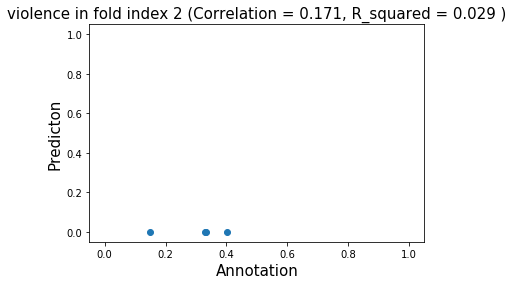

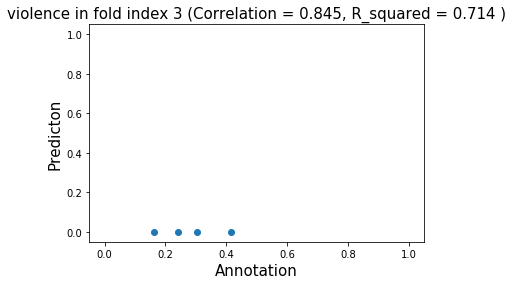

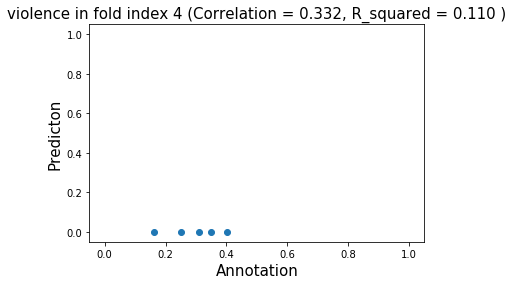

In [6]:
r_squared_all_folds = []
corr_all_folds = []

for indx, fold in enumerate(folds):
    # remove masked values from test set
    non_masked_violence_true = fold[fold["violence"] != - 1]["violence"]
    non_masked_violence_preds = fold[fold["violence"] != - 1]["pred_violence"]
    
    fig, ax = plt.subplots()
    plt.scatter(non_masked_violence_true, non_masked_violence_preds, label = "violence")
    plt.xlim([-.05,1.05])
    plt.ylim([-.05,1.05])
    plt.xlabel('Annotation', fontsize = 15)
    plt.ylabel('Predicton', fontsize = 15)
    corr, pval = scipy.stats.pearsonr(non_masked_violence_true, non_masked_violence_preds)
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(non_masked_violence_true,non_masked_violence_preds)
    r_squared = r_value ** 2
    r_squared_all_folds.append(r_squared)
    corr_all_folds.append(corr)
    plt.title(('{attr} in fold index {fold} (Correlation = {corr:.3f}, R_squared = {r_2:.3f} )'
                .format(attr = "violence", corr= corr, r_2 = r_squared, fold = indx  )), fontsize = 15)
    
std_rsquare = np.std(np.array(r_squared_all_folds))
mean_rsquare = np.mean(np.array(r_squared_all_folds))

std_corr = np.std(np.array(corr_all_folds))
mean_corr = np.mean(np.array(corr_all_folds))

print("the rsquare measure has a mean of ", mean_rsquare, " and standard deviation of ", std_rsquare)
print("the correlation measure has a mean of ", mean_corr, " and standard deviation of ", std_corr)